In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new dataset as per the user's instructions for step-by-step plotting
new_clean_data_path = 'plot_data_BNBD.csv'
# Reload the dataset using the first column as the index
new_clean_data = pd.read_csv(new_clean_data_path, index_col=0)


new_clean_data.fillna('None', inplace=True)

# Display the first few rows of the dataframe to confirm the index is set correctly
new_clean_data




,model,prior,duplicates_level,distortion_level,precision_median,recall_median,f1score_median,precision_lower_bound,precision_upper_bound,recall_lower_bound,recall_upper_bound,f1score_lower_bound,f1score_upper_bound
0,Both,BNBD10,High,High,1.000000,0.694644,0.819811,0.996025,1.000000,0.690028,0.760012,0.816115,0.862860
1,Both,BNBD10,High,Low,1.000000,0.936901,0.967423,1.000000,1.000000,0.934066,0.940535,0.965717,0.969356
2,Both,BNBD10,Low,High,1.000000,0.750000,0.857143,1.000000,1.000000,0.733333,0.750000,0.846154,0.857143
3,Both,BNBD10,Low,Low,0.983607,0.952381,0.967742,0.967742,1.000000,0.952381,0.952381,0.960000,0.975610
4,Both,BNBD10,Medium,High,0.989011,0.739220,0.846063,0.988872,0.991758,0.733522,0.742864,0.842288,0.848689
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Neither,uniform,Low,Low,0.307692,0.952381,0.465116,0.292292,0.323060,0.952381,0.952381,0.447303,0.482462
156,Neither,uniform,Medium,High,0.983471,0.854209,0.913784,0.974249,0.988896,0.847485,0.864476,0.908617,0.922111
157,Neither,uniform,Medium,Low,1.000000,0.919192,0.957895,0.997203,1.000000,0.918636,0.925253,0.955857,0.961175
158,Neither,uniform,Very High,High,1.000000,0.825620,0.904482,0.999331,1.000000,0.819215,0.834591,0.900625,0.909838


Both
Neither
No Diri
No Empirical


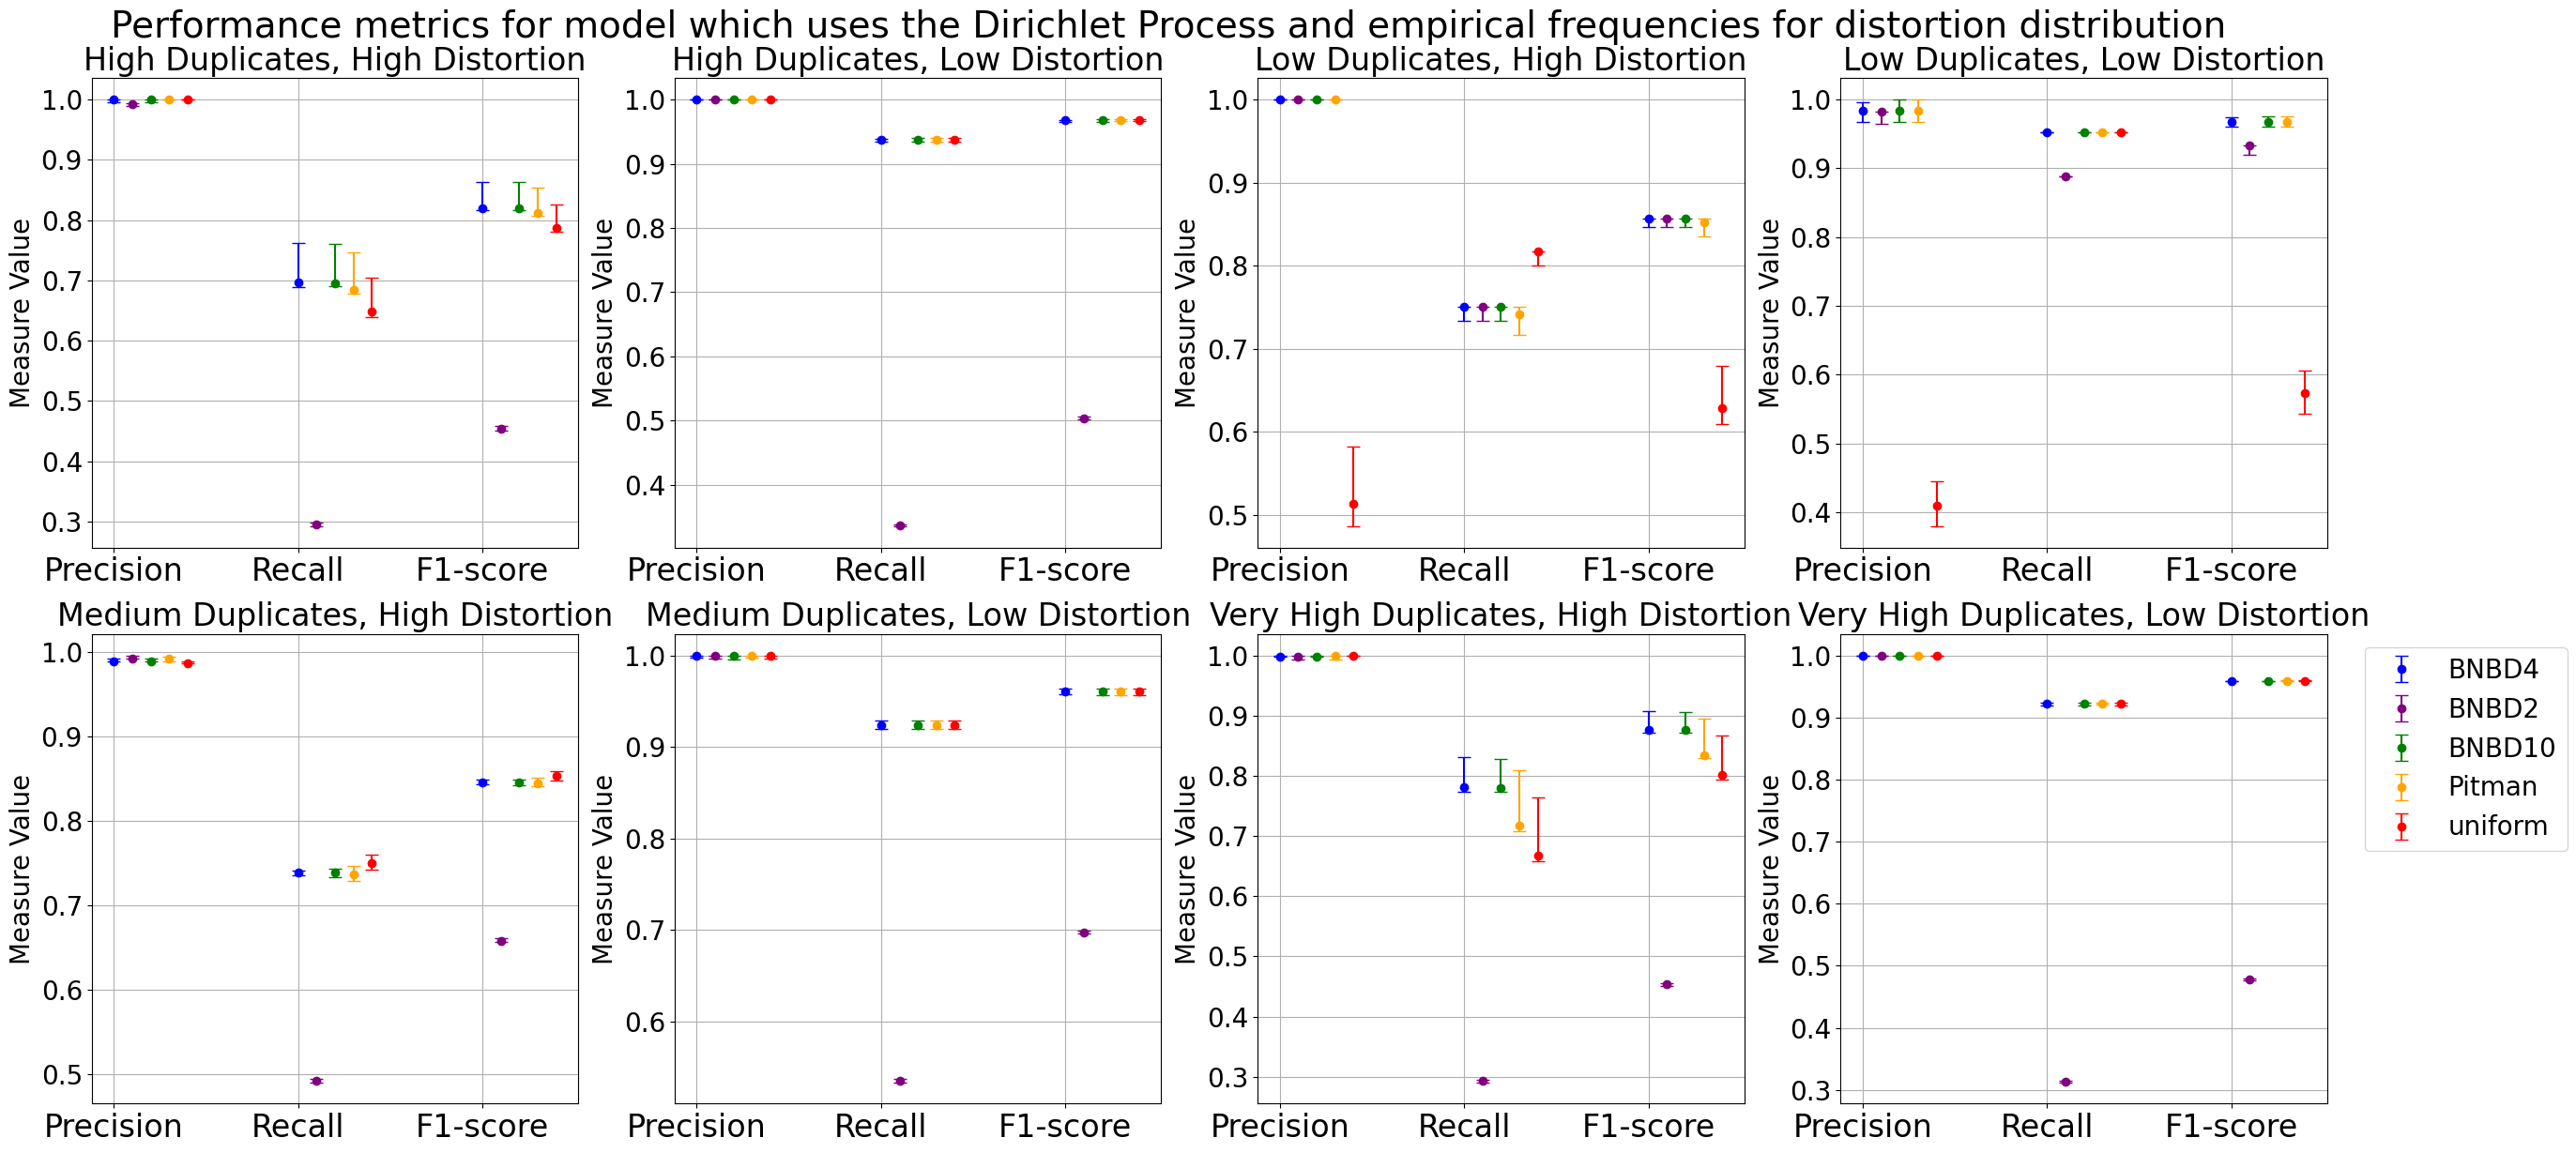

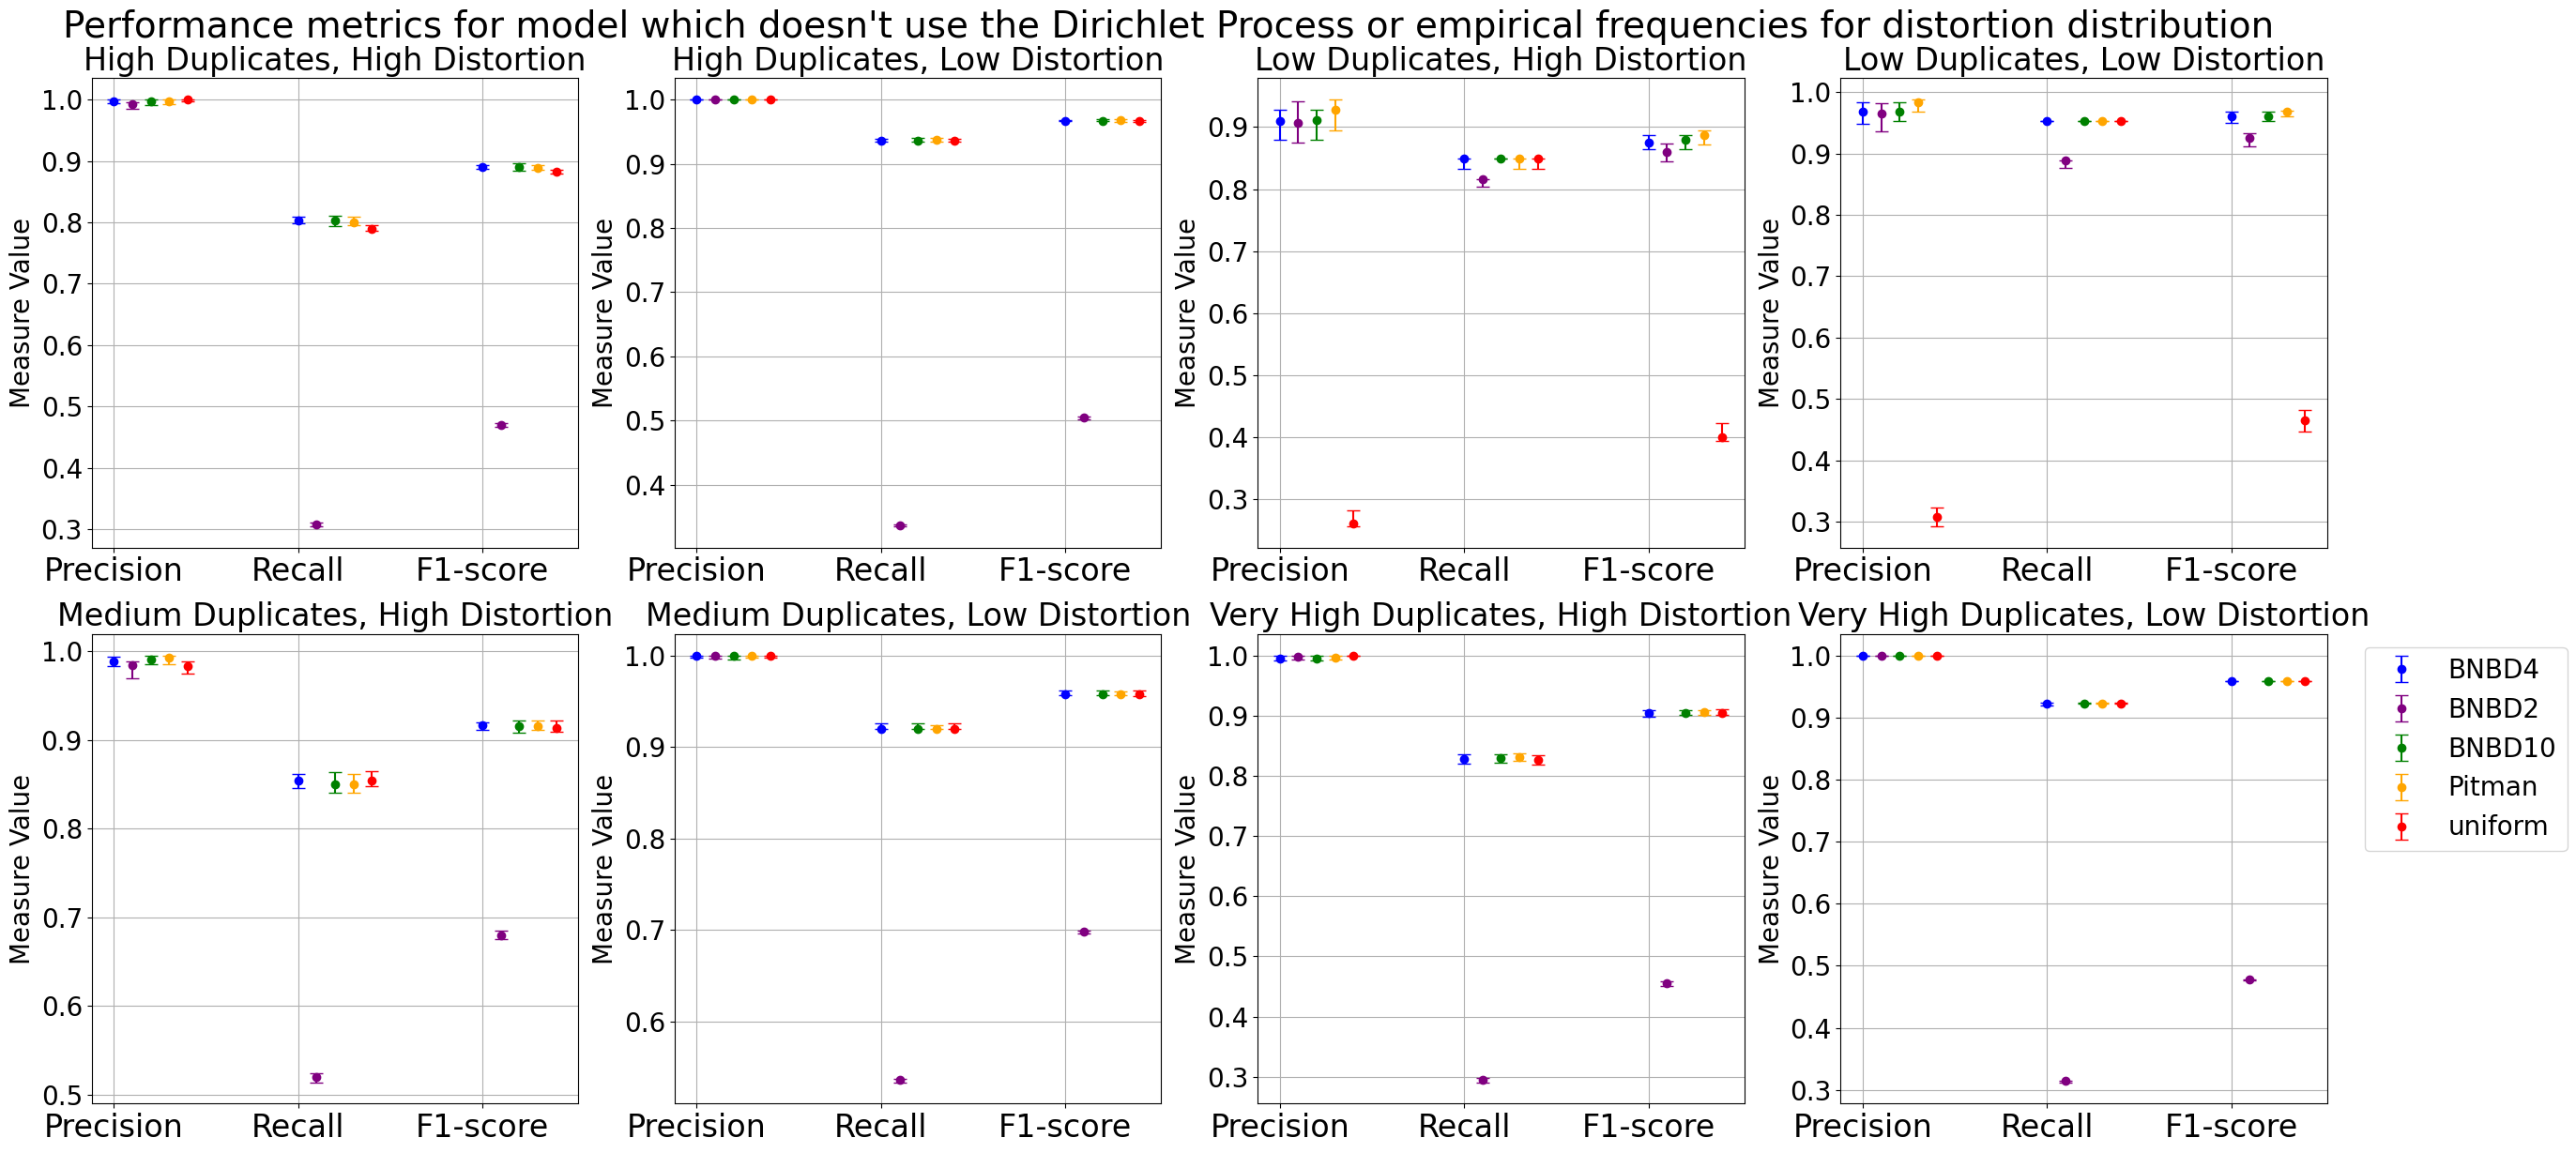

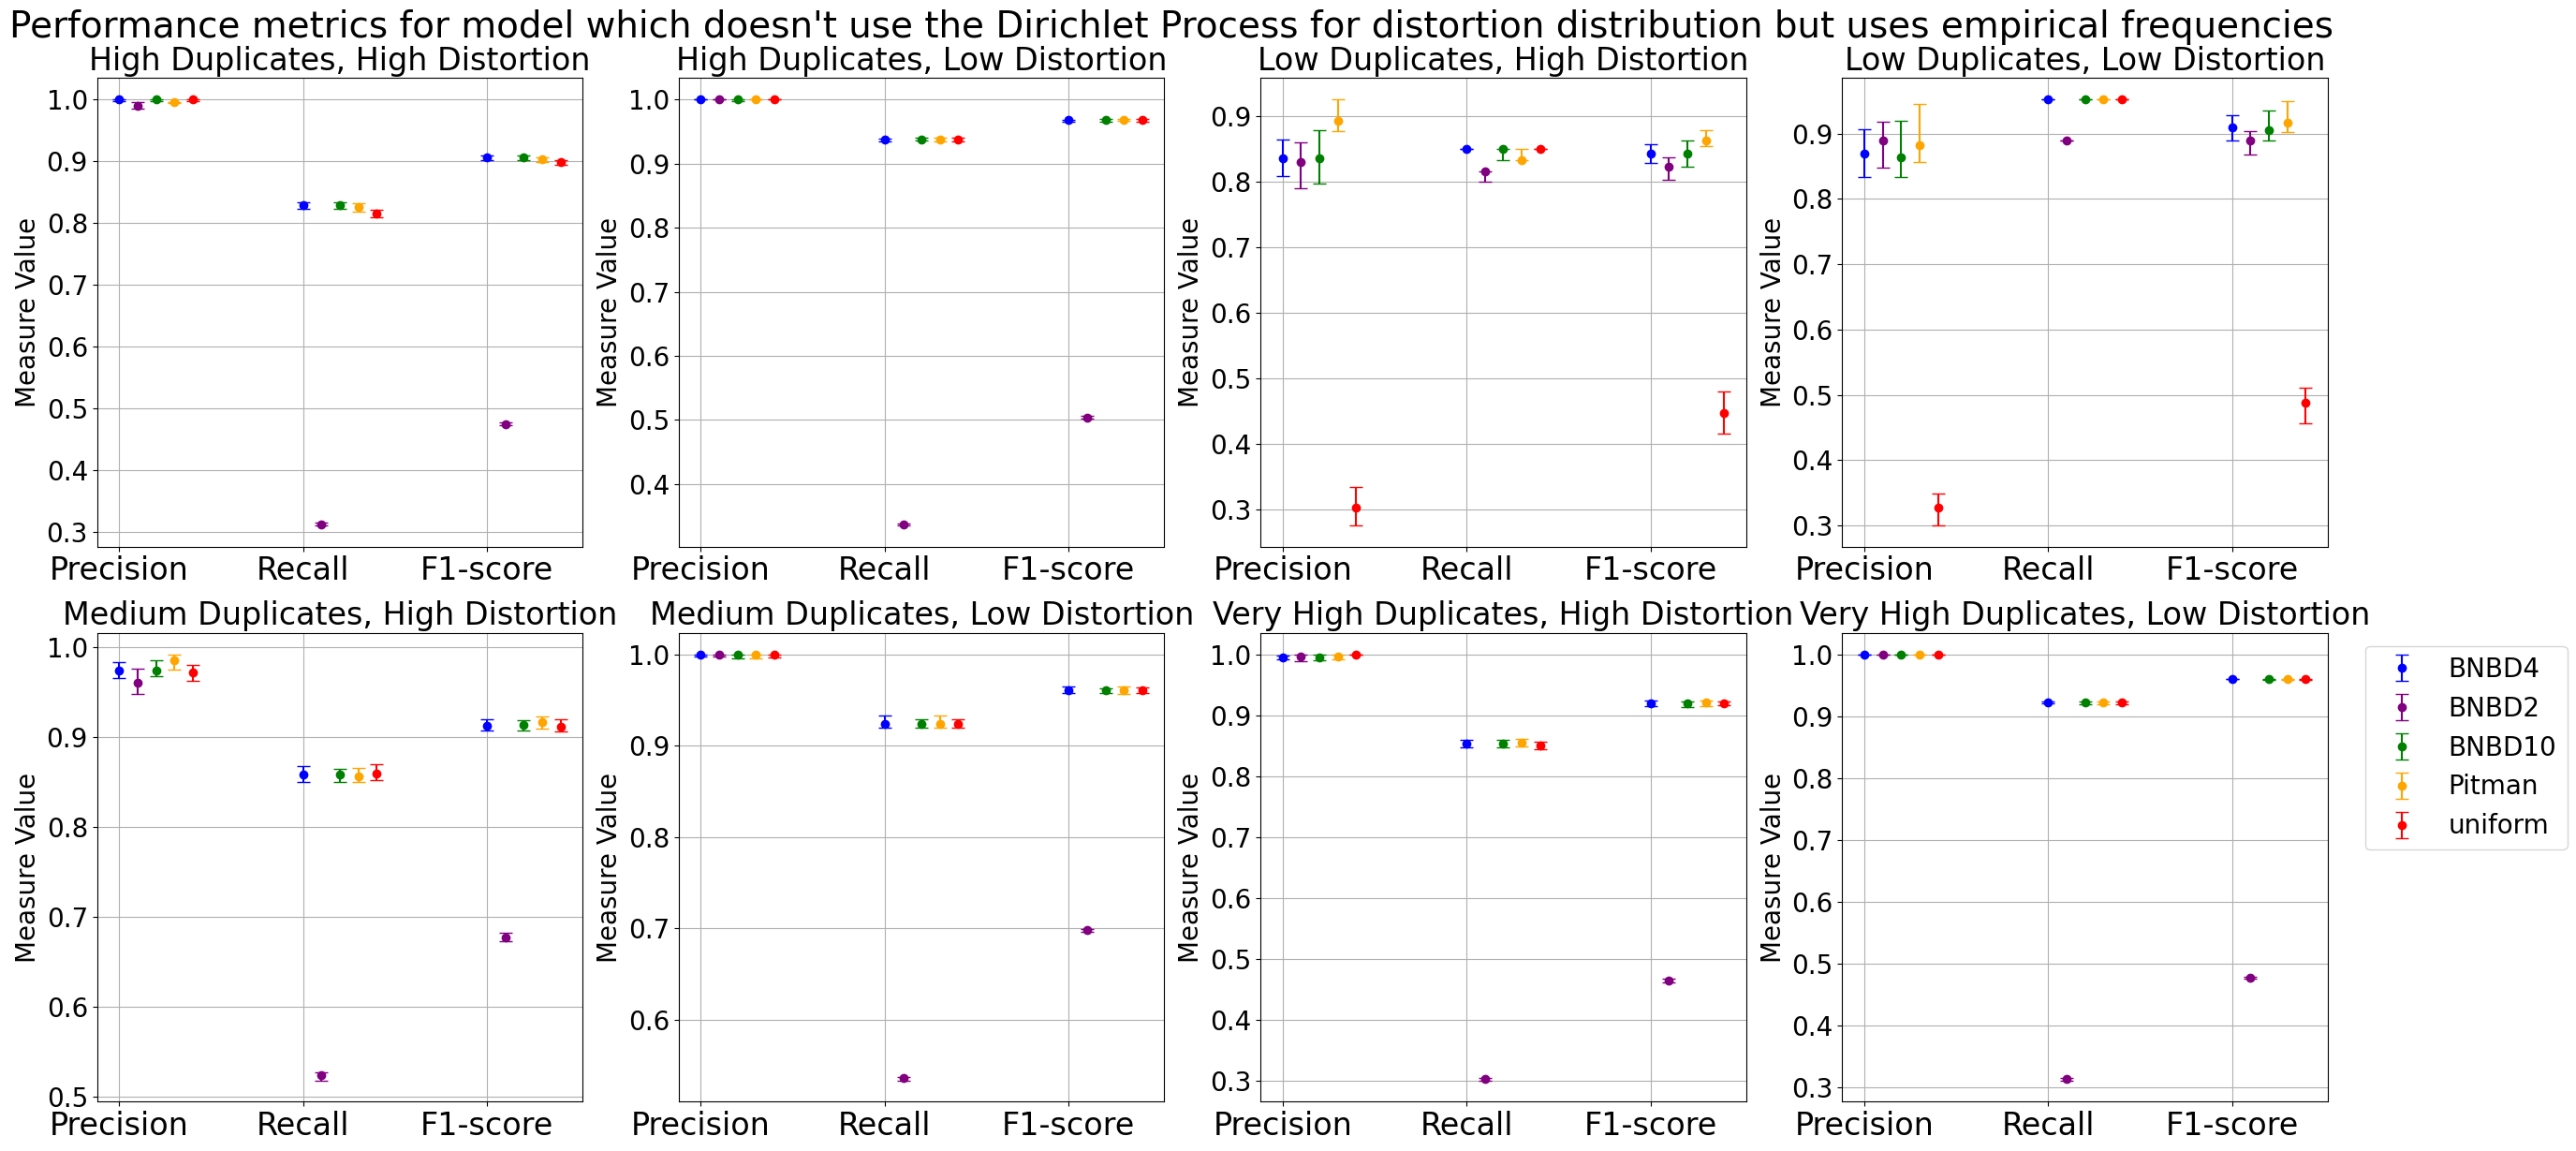

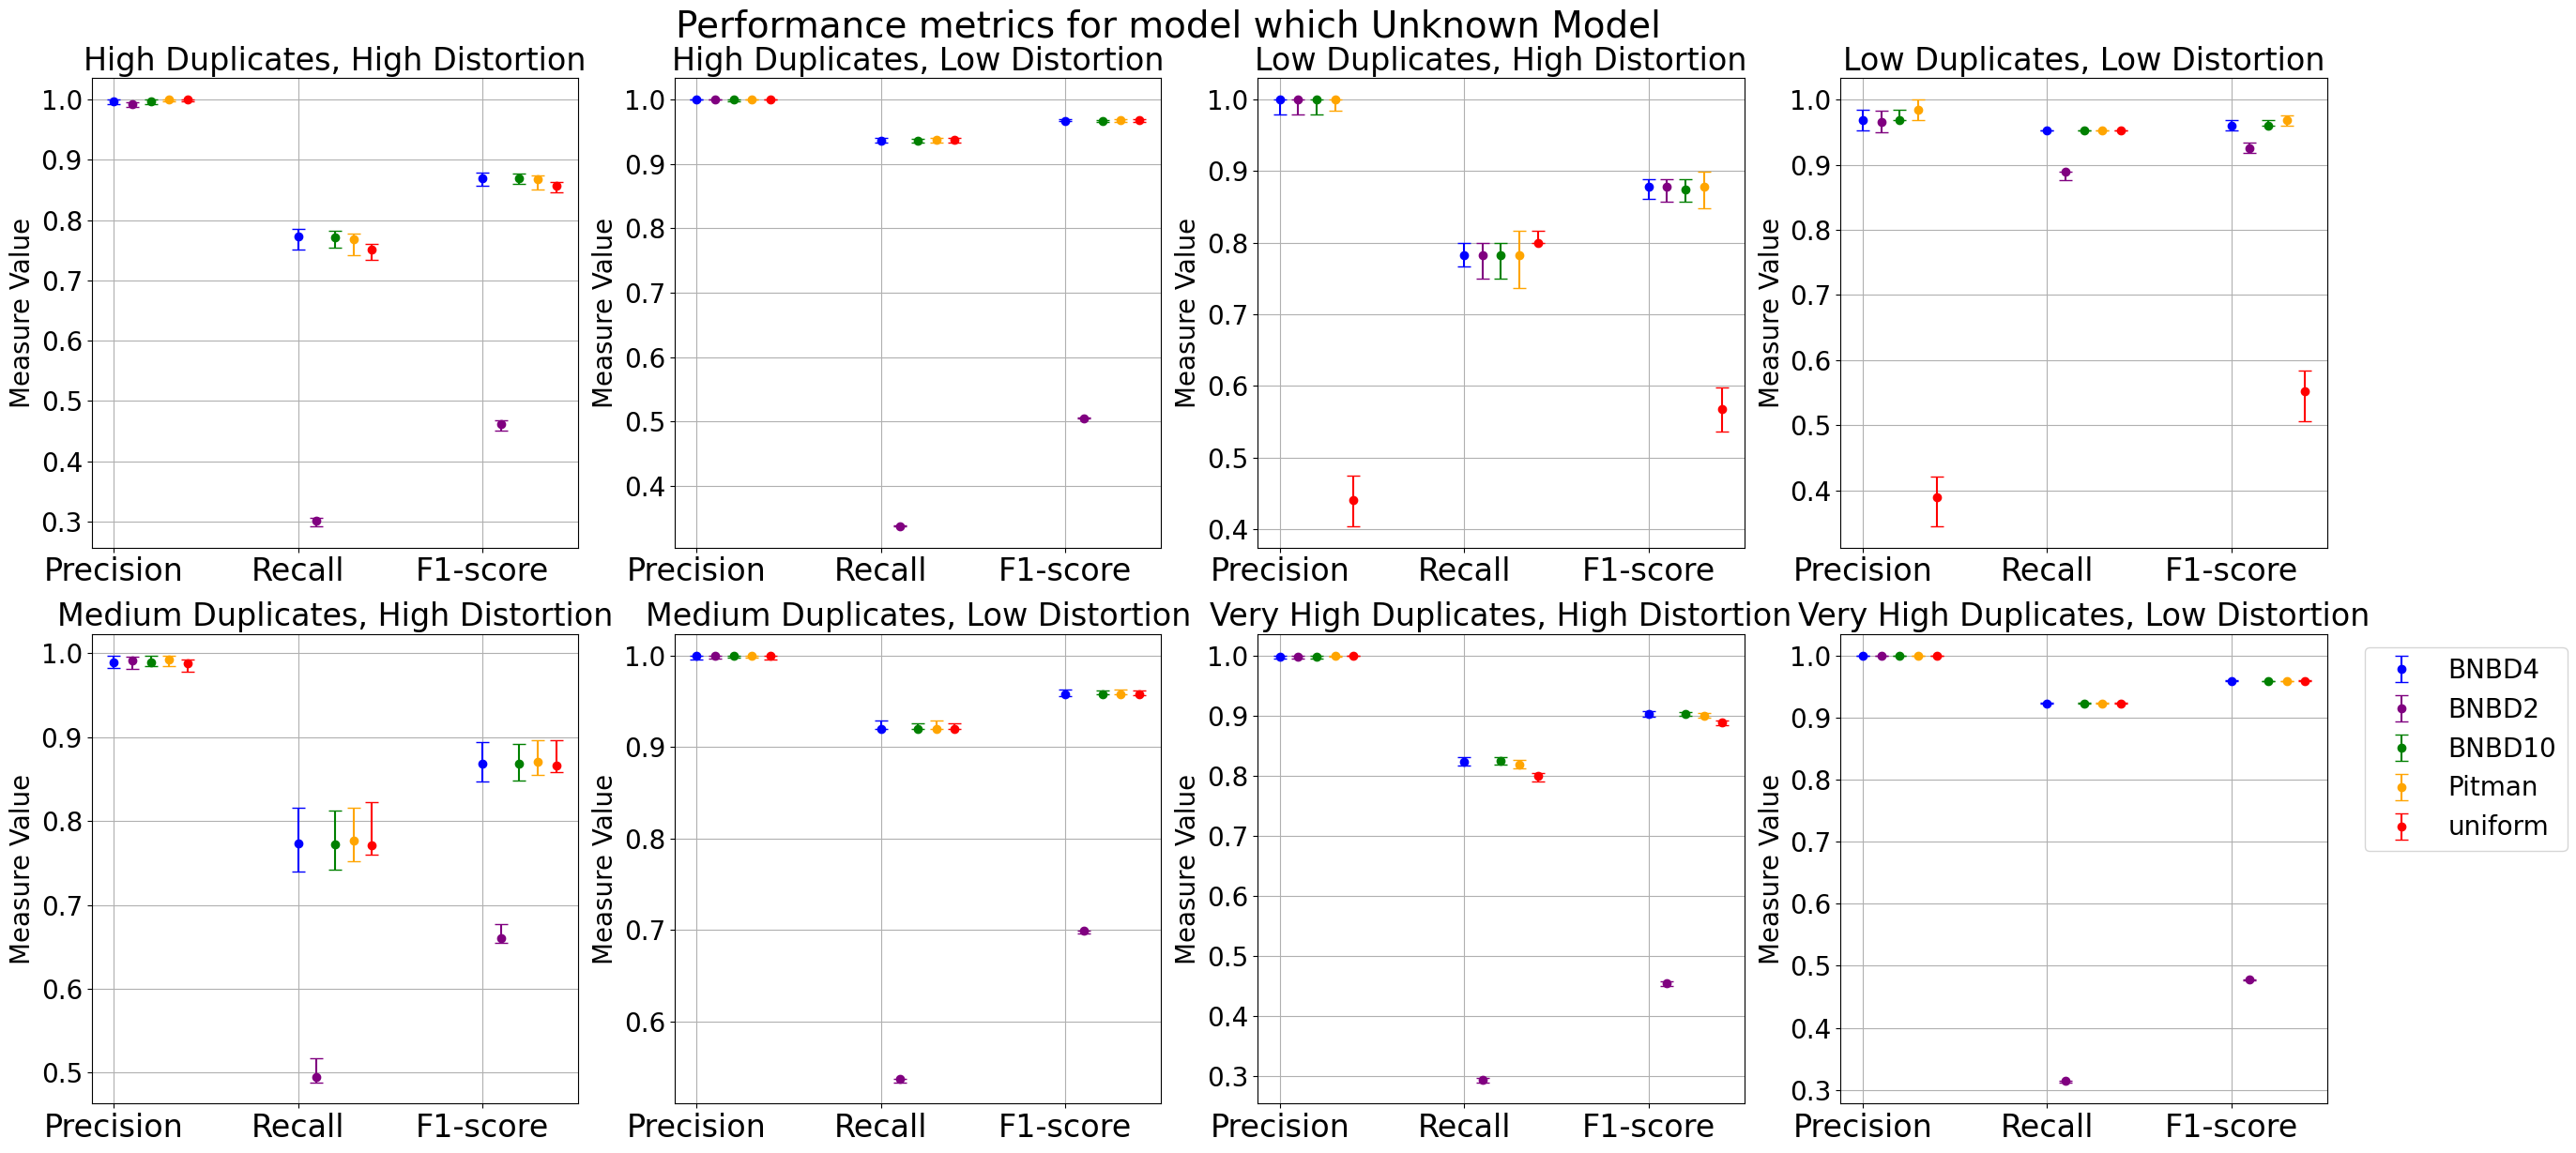

In [2]:
# Load the dataset anew for plotting other models, as we've encountered a reset previously


# Starting with "No Diri" model

title_mapping = {
    "Both": "uses the Dirichlet Process and empirical frequencies for distortion distribution",
    "No Diri": "doesn't use the Dirichlet Process for distortion distribution but uses empirical frequencies",
    "No Empiri": "uses the Dirichlet Process for distortion distribution and doesn't use empirical frequencies",
    "Neither": "doesn't use the Dirichlet Process or empirical frequencies for distortion distribution"
}

df = new_clean_data

for model_to_plot in new_clean_data["model"].unique():
    df_model = df[df['model'] == model_to_plot]

    metrics = ['precision_median', 'recall_median', 'f1score_median']
    priors = ["BNBD4", "BNBD2", "BNBD10", "Pitman", "uniform"]

    filtered_data = new_clean_data[new_clean_data['model'] == 'Both']

    duplicates_levels = filtered_data['duplicates_level'].unique()
    distortion_levels = filtered_data['distortion_level'].unique()

    colors = {0: 'blue', 1: 'purple', 2: 'green', 3:"orange", 4:"red"}

    

    plt.figure(figsize=(25, 12))
        
    for j, dup_level in enumerate(duplicates_levels):
        for k, dist_level in enumerate(distortion_levels):
            index = (j * 2 + k)+1
            plt.subplot(2, 4, index)
            
            for p, prior in enumerate(priors):
            
                df_plot = df_model[(df_model['duplicates_level'] == dup_level) & 
                                (df_model['distortion_level'] == dist_level) & 
                                (df_model['prior'] == prior)
                                ]
                
                subset = df_plot
                
                
                for i, metric in enumerate(metrics):
                    upper_bound = metric.replace('median', 'upper_bound')
                    lower_bound = metric.replace('median', 'lower_bound')
                    
                    upper_bound =  subset[upper_bound] - subset[metric]
                    lower_bound = subset[metric] - subset[lower_bound]
                    if upper_bound.iloc[0]<0.001:
                        upper_bound.iloc[0] = 0
                    if lower_bound.iloc[0]<0.001:
                        lower_bound.iloc[0] = 0
                    
                    
                    x_values = [p * 0.1 + i]
                    plt.errorbar(x_values, subset[metric], yerr=[lower_bound, upper_bound], fmt='o', capsize=5, color=colors[p], label=f'{prior}')
                    plt.yticks(fontsize=20)
                    plt.xticks(ticks=range(3), labels=["Precision", "Recall", "F1-score"], fontsize=24)
                    plt.title(f'{dup_level} Duplicates, {dist_level} Distortion', fontsize=24)
                    plt.ylabel("Measure Value", fontsize=20)
                    plt.grid(True)

    plt.tight_layout()
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_legend = dict(zip(labels, handles))

    # Now call plt.legend() with the unique handles and labels
    plt.legend(unique_legend.values(), unique_legend.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.suptitle(f"Performance metrics for model which {title_mapping.get(model_to_plot, 'Unknown Model')}", fontsize=28, y=1.02)

    # Save the plot for "No Diri"
    print(model_to_plot)
    no_diri_plot_path = f"plots/{model_to_plot}_plot.png"
    plt.savefig(no_diri_plot_path, bbox_inches='tight')
    # no_diri_plot_path


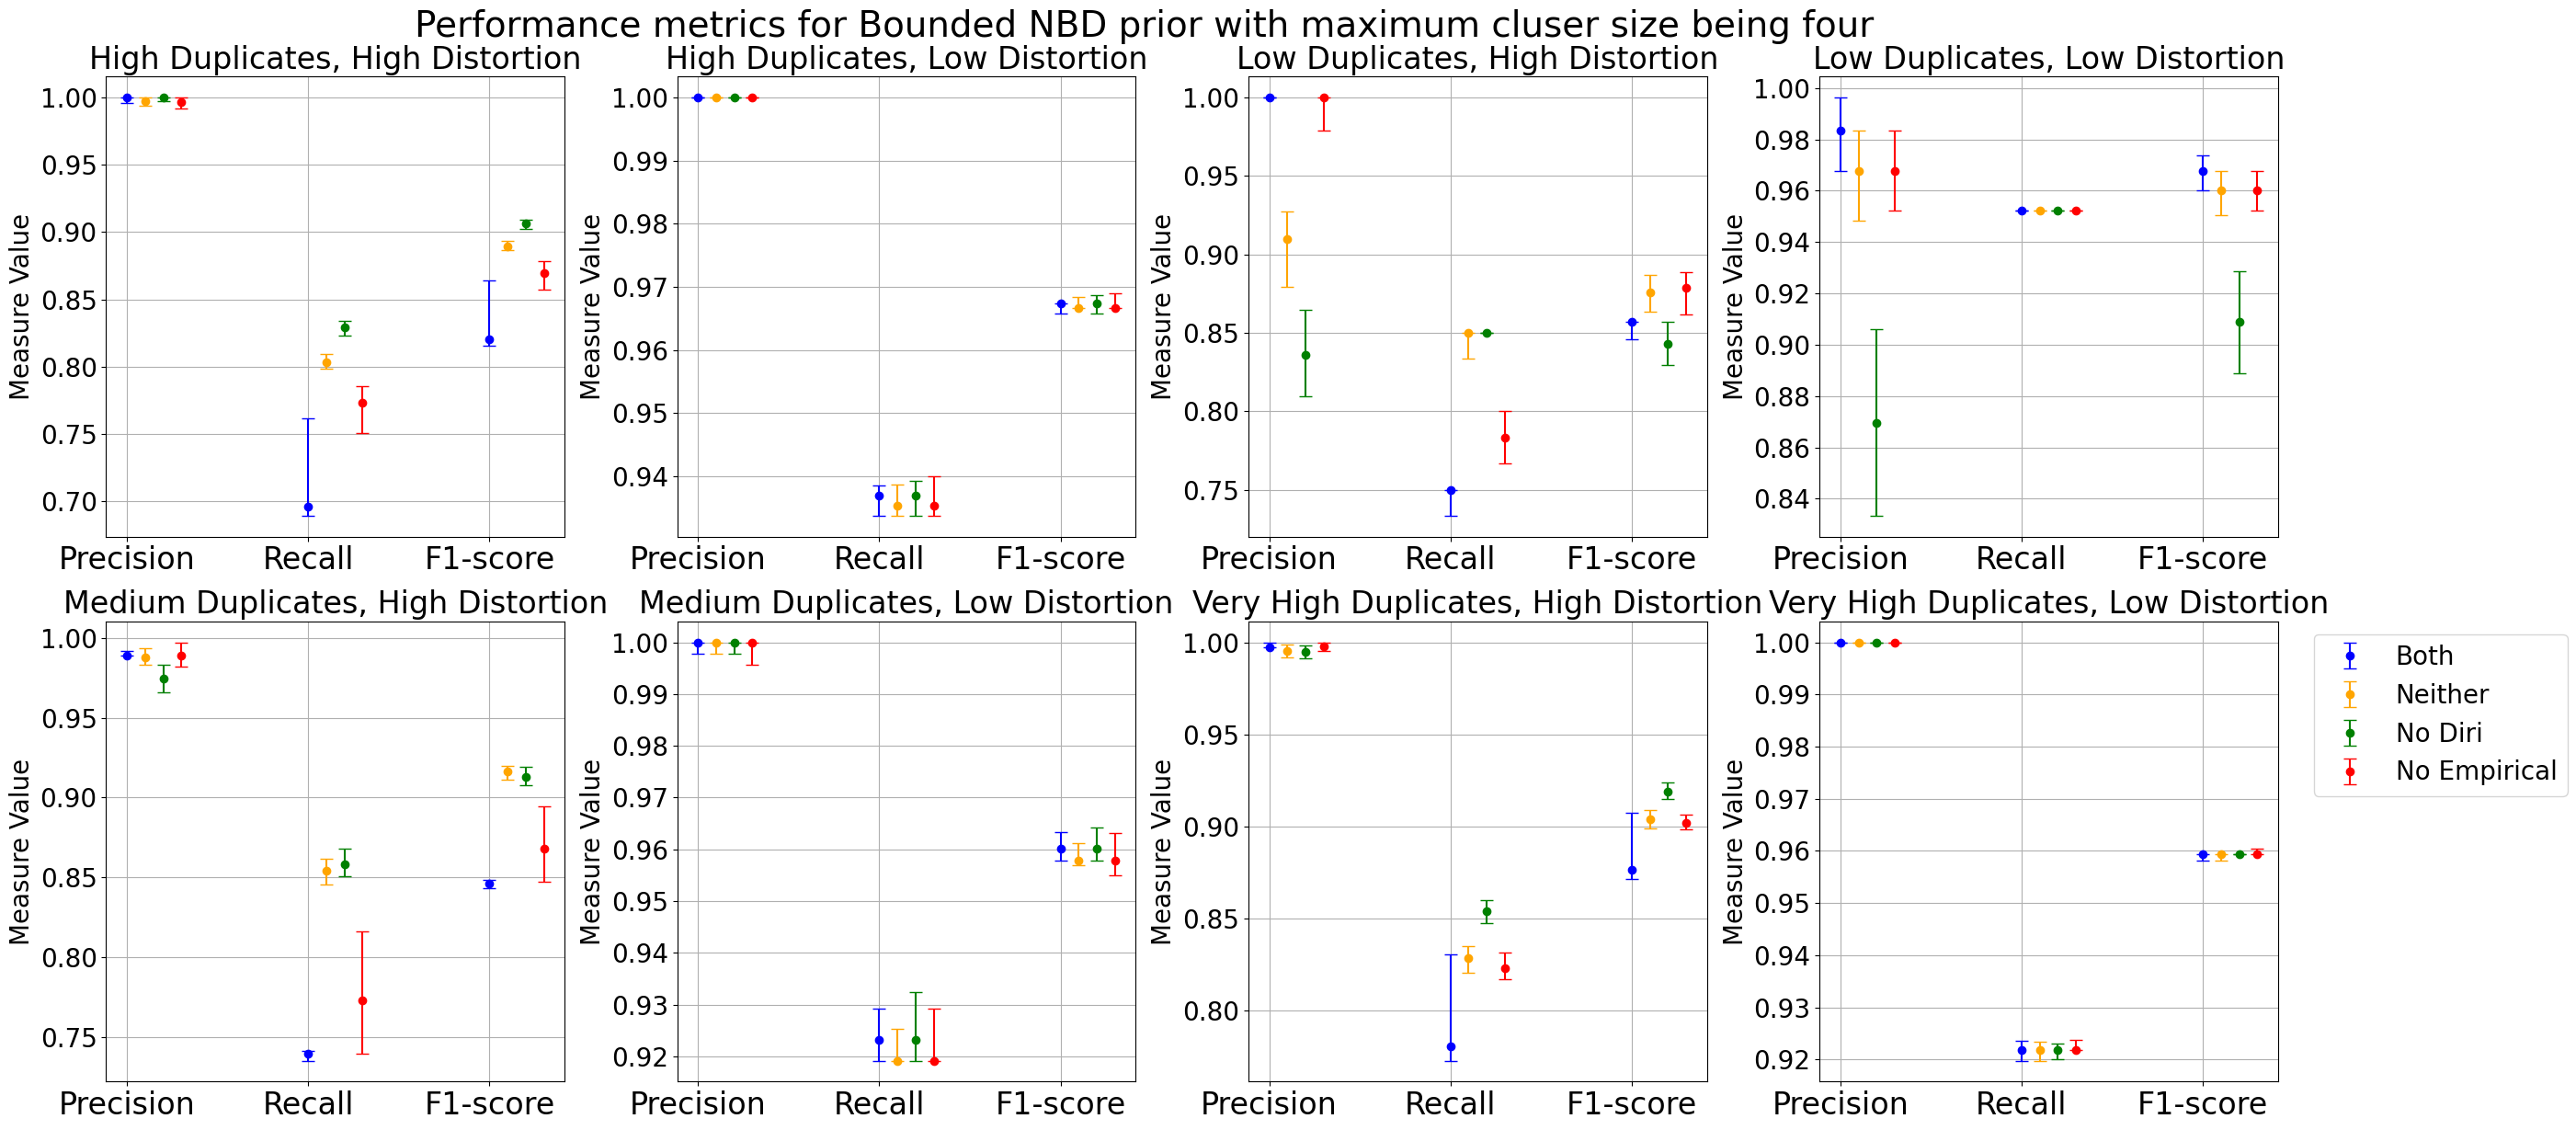

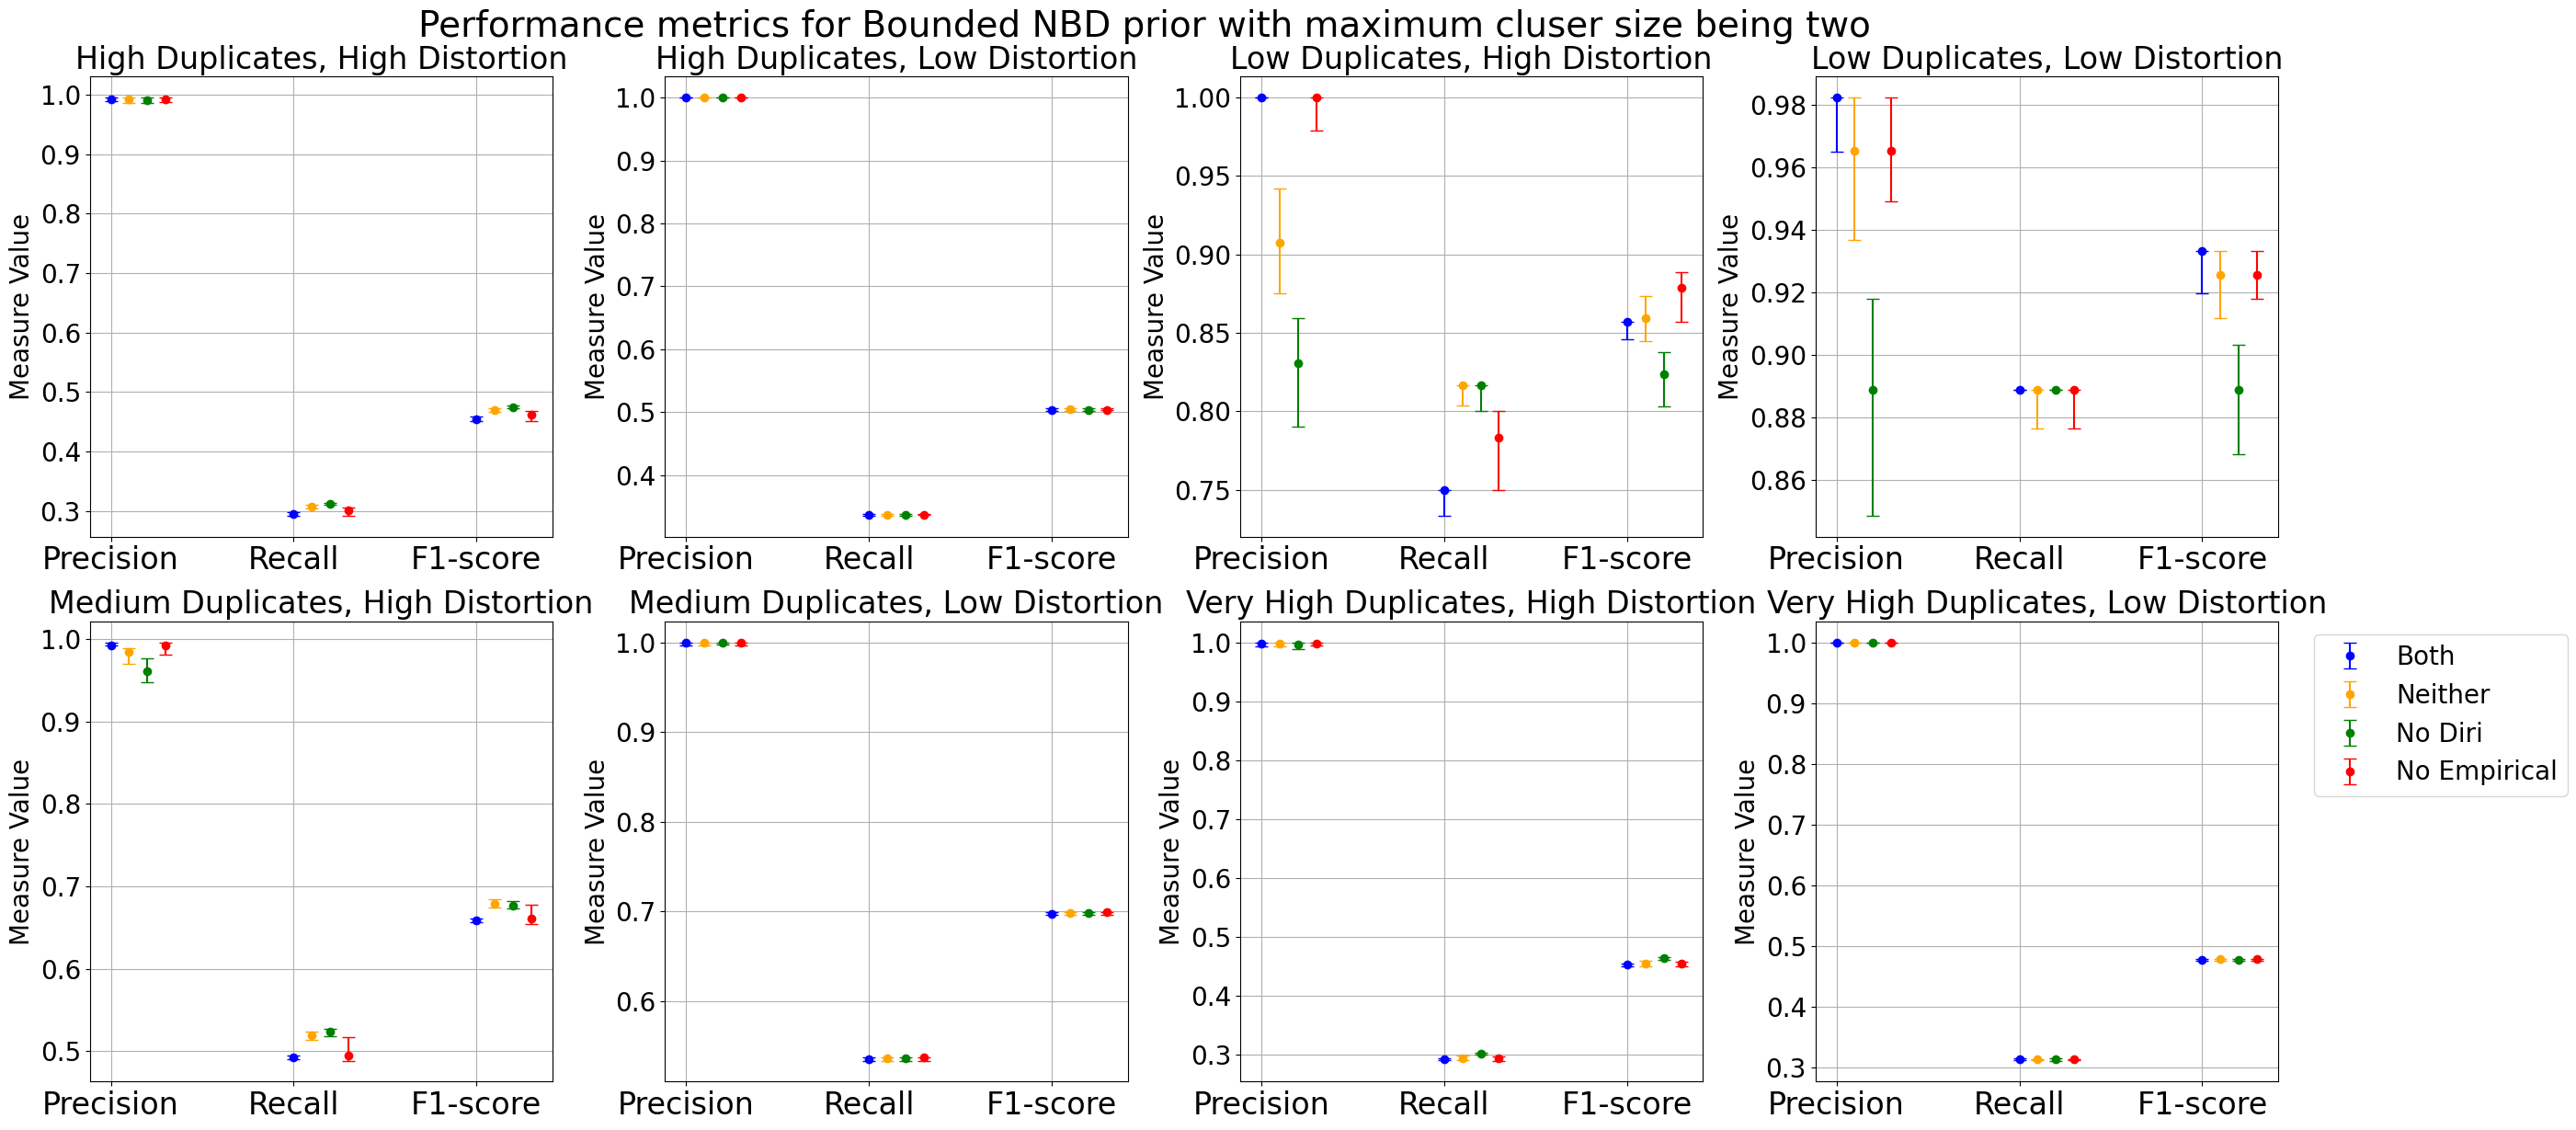

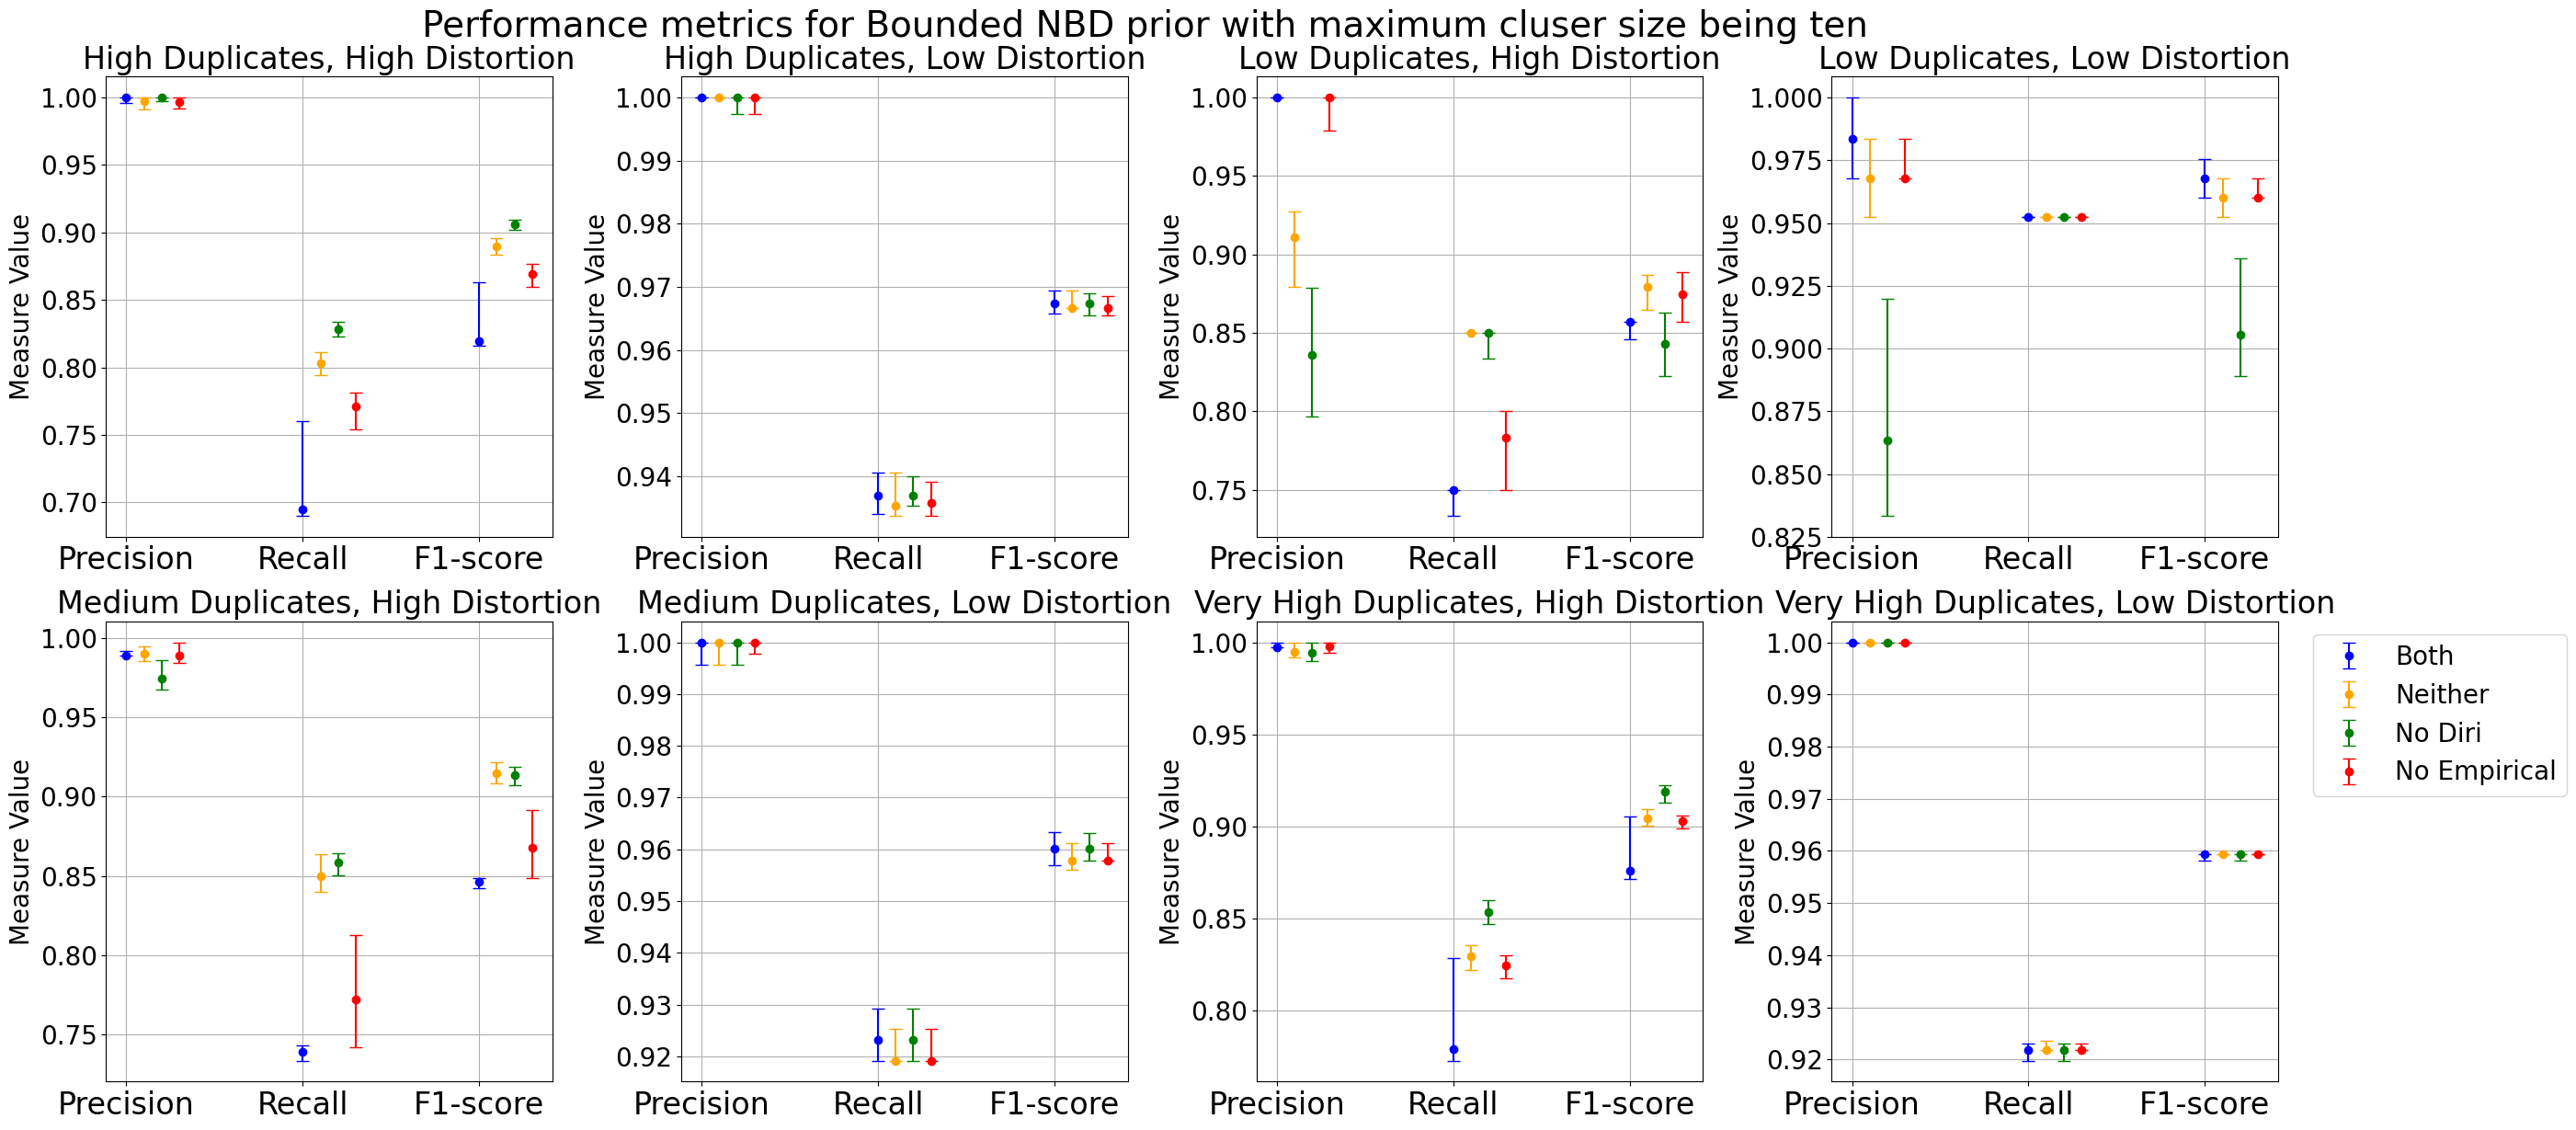

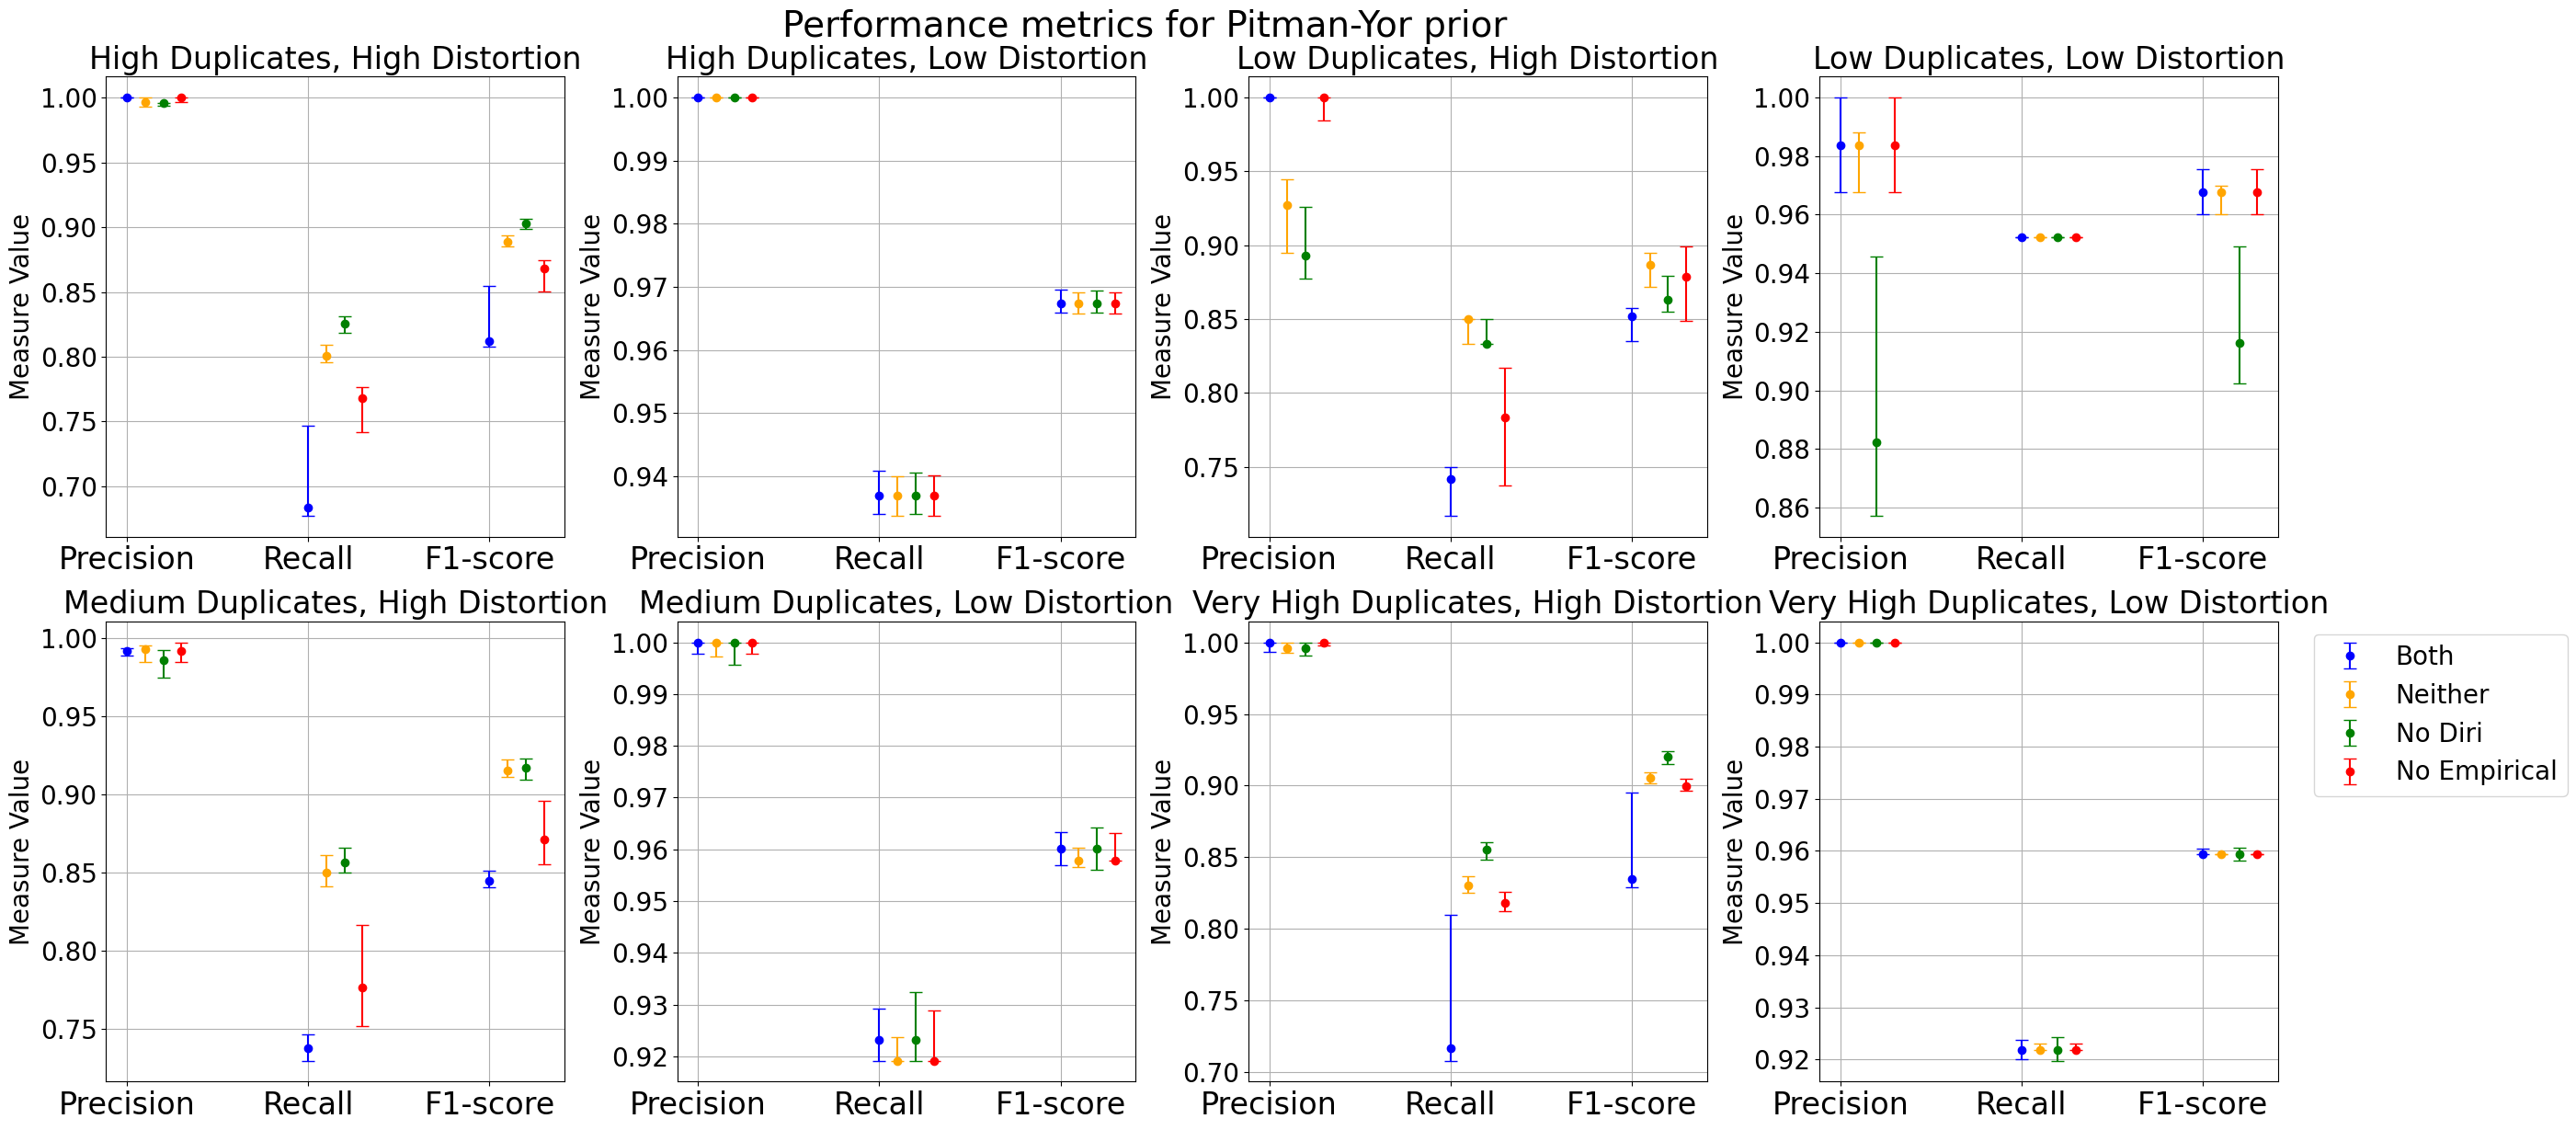

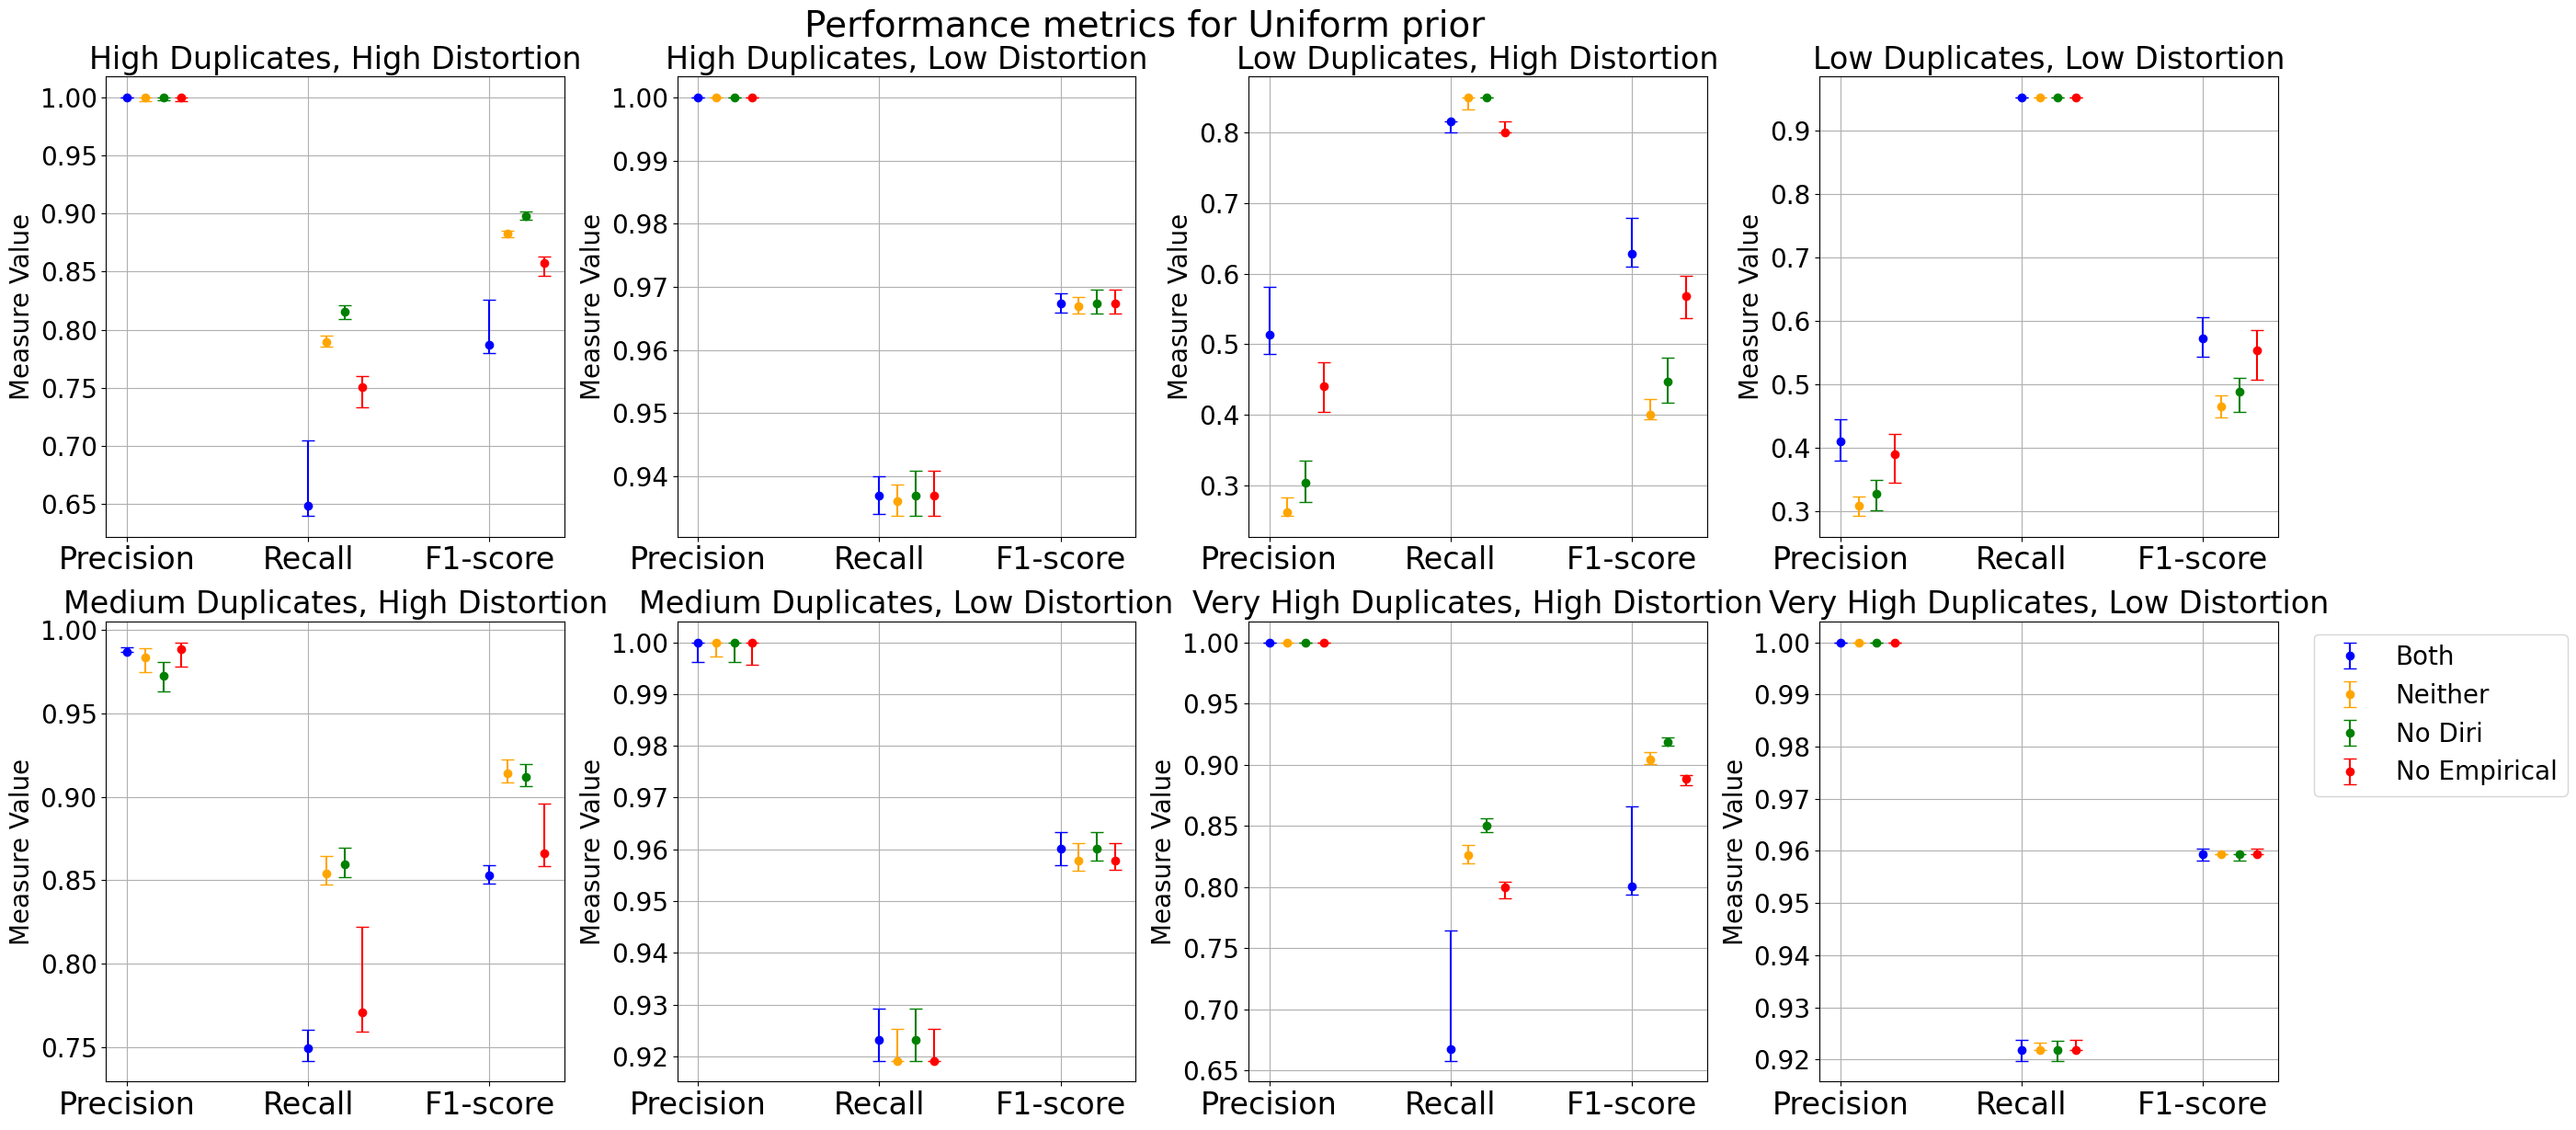

In [3]:
# Load the dataset anew for plotting other models, as we've encountered a reset previously


# Starting with "No Diri" model

title_mapping = {
    "BNBD4": "Bounded NBD prior with maximum cluser size being four",
    "BNBD2": "Bounded NBD prior with maximum cluser size being two",
    "BNBD10": "Bounded NBD prior with maximum cluser size being ten",
    "Pitman": "Pitman-Yor prior",
    "uniform": "Uniform prior"
}

df = new_clean_data
priors = ["BNBD4", "BNBD2", "BNBD10", "Pitman", "uniform"]
for p, prior in enumerate(priors):

    df_model = df[df['prior'] == prior]

    metrics = ['precision_median', 'recall_median', 'f1score_median']
    

    filtered_data = new_clean_data[new_clean_data['model'] == 'Both']

    duplicates_levels = filtered_data['duplicates_level'].unique()
    distortion_levels = filtered_data['distortion_level'].unique()

    colors = {0: 'blue', 1: 'orange', 2: 'green', 3:"red"}

    

    plt.figure(figsize=(25, 12))
        
    for j, dup_level in enumerate(duplicates_levels):
        for k, dist_level in enumerate(distortion_levels):
            index = (j * 2 + k)+1
            plt.subplot(2, 4, index)
            
            for m, model in enumerate(new_clean_data["model"].unique()):
            
                df_plot = df_model[(df_model['duplicates_level'] == dup_level) & 
                                (df_model['distortion_level'] == dist_level) & 
                                (df_model['model'] == model)
                                ]
                
                subset = df_plot
                
                
                for i, metric in enumerate(metrics):
                    upper_bound = metric.replace('median', 'upper_bound')
                    lower_bound = metric.replace('median', 'lower_bound')
                    
                    upper_bound =  subset[upper_bound] - subset[metric]
                    lower_bound = subset[metric] - subset[lower_bound]
                    if upper_bound.iloc[0]<0.001:
                        upper_bound.iloc[0] = 0
                    if lower_bound.iloc[0]<0.001:
                        lower_bound.iloc[0] = 0
                    
                    
                    x_values = [m * 0.1 + i]
                    plt.errorbar(x_values, subset[metric], yerr=[lower_bound, upper_bound], fmt='o', capsize=5, color=colors[m], label=f'{model}')
                    plt.yticks(fontsize=20)
                    plt.xticks(ticks=range(3), labels=["Precision", "Recall", "F1-score"], fontsize=24)
                    plt.title(f'{dup_level} Duplicates, {dist_level} Distortion', fontsize=24)
                    plt.ylabel("Measure Value", fontsize=20)
                    plt.grid(True)

    plt.tight_layout()
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_legend = dict(zip(labels, handles))

    # Now call plt.legend() with the unique handles and labels
    plt.legend(unique_legend.values(), unique_legend.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.suptitle(f"Performance metrics for {title_mapping.get(prior, 'Unknown Model')}", fontsize=28, y=1.02)

    # Save the plot for "No Diri"
    no_diri_plot_path = f"plots/model_{prior}_plot.png"
    plt.savefig(no_diri_plot_path, bbox_inches='tight')
    # no_diri_plot_path
